# Overview

This is a python package that helps process, filter, and 
analyze the Global Historical Climatology Network Daily dataset. 

# I. Import
The first step is to import all the modules. Do this by using the following import statement. This will give you access to all available modules and classes that the package has to offer.
  
There are currently four modules included.
1. preprocessor
2. stats
3. plotter
4. conversion
  
The preprocessor has three classes which serve as the core building blocks for managing and manipulating the GLobal Historical Climatology Network Daily dataset.
1. StationPreprocessor
2. Station
3. ClimateVar 

In [1]:
from GHCND import *

# II. The StationPreprocessor
After you import, you will then make a StationPreprocessor object that points to two files and one directory.  
The two files reference the necessary station metadata to create the data objects while the directory point to the location of the .dly files. The .dly files are fixed width text files that contain the station data.

In [2]:
sp = preprocessor.StationPreprocessor("D:/GHCND_data/ghcnd-stations.txt",
                                "D:/GHCND_data/ghcnd-inventory.txt",
                                "D:/GHCND_data/ghcnd_all.tar/ghcnd_all/ghcnd_all")

# III. Define which stations to fetch

The next step is to define which countries you would like to process and summarize data for. In the case of the United States and Canada, you can also specify which state, province, or territory you would like to fetch data for. 

To set the countries and states for processing, use the addCountries and addStates methods.
```python
StationPreprocessor.addCountries(country_names)
StationPreprocessor.addStates(state_names)
```
both country_names and state_names should be a list of strings. In the following code snippet, the United States is added as a country and the states of Wisconsin and Minnesota are added.

In [3]:
sp.addCountries(["united states"])
sp.addStates(["wisconsin","minnesota"])

You can print or return the states and countries defined in the StationPreprocessor as follows. Notice that the internal representation of the states and countries are abreviations and not the actual name.

In [4]:
print(sp.states)
print(sp.countries)

['WI', 'MN']
['US']


In [5]:
print(sp.stations)

[]


# IV. Build the Station objects

After you have defined which stations you want to process data for, you can build the Station objects. Station objects have metadata about the station such as station ID, elevation, latitude, longitude, etc.

In [6]:
sp.addStations()

You can see that there are now station objects in the StationPreprocessor.

In [8]:
len(sp.stations)

1939

In [9]:
sp.stations[0] # returns the station object

In [10]:
print(sp.stations[0]) # a human readable string

US1MNAA0002,US,MN,45.1947,-93.3257,263.0,False,False,False,None


A station object has many attributes. At this point, each station object doesn't have any variables such as precipitation or temperature attached to it because it has not yet read the data files.

In [11]:
print("station ID: ", sp.stations[0].stationId)
print("counry: ", sp.stations[0].country)
print("state: ", sp.stations[0].state)
print("latitude: ", sp.stations[0].lat) 
print("longitude: ", sp.stations[0].lon)
print("elevation: ", sp.stations[0].elev)
print("is the station part of the u.s. historical climatology network: ", sp.stations[0].hcn)
print("is the station part of the u.s. climate reference network: ", sp.stations[0].crn)
print("world meteorological station number: ", sp.stations[0].wmoId)
print("station variables: ", sp.stations[0].variables)

('station ID: ', 'US1MNAA0002')
('counry: ', 'US')
('state: ', 'MN')
('latitude: ', 45.1947)
('longitude: ', -93.3257)
('elevation: ', 263.0)
('is the station part of the u.s. historical climatology network: ', False)
('is the station part of the u.s. climate reference network: ', False)
('world meteorological station number: ', None)
('station variables: ', {})


# V. Parse the daily data files

It is finally time to parse the daily data files and add data to the station objects. After this step, the Station objects will have a dictionary where the keys are variable names such as "TMIN", "TMAX", "PRCP", etc. and the values associated with them are the ClimateVar objects.  

Use the  
```python
stationPreprocessor.processDlyFiles(variable_names)
```
method to begin reading the data files. variable_names should be a list of strings representing the names of the variables you would like to include.

In [12]:
sp.processDlyFiles(["TMAX","TMIN","PRCP"])

reading 1939 stations
done with 200 stations. 10% complete.
done with 400 stations. 20% complete.
done with 600 stations. 30% complete.
done with 800 stations. 41% complete.
done with 1000 stations. 51% complete.
done with 1200 stations. 61% complete.
done with 1400 stations. 72% complete.
done with 1600 stations. 82% complete.
done with 1800 stations. 92% complete.
done reading stations. 852 stations left after filtering
total data read time: 161.262000084


The daily data is now loaded into the StationPreprocessor. The following example tells us that there are two variables ("TMAX" and "TMIN") in the Station object at index 0 of the StationPreprocessor's stations attribute. The keys in the dictionary are associated with the ClimateVar objects. By printing the ClimateVar object we see that it holds maximum temperature data, at a daily temporal resolution, and its record begins on Jan 1, 1893 and ends on Oct 31, 2017.

In [13]:
sp.stations[0].variables

{'PRCP': <GHCND.preprocessor.ClimateVar at 0xebe6f60>,
 'TMAX': <GHCND.preprocessor.ClimateVar at 0x13e6d048>}

In [14]:
print(sp.stations[0].variables["TMAX"])

TMAX,daily,1893-01-01,2017-10-31


The temperature data from the GHCND is in tenths of degrees Celsius. You could convert this data using the conversion.TenthsCelsiusToCelsius() and passing in the StationPreprocessor as an argument. 

In [15]:
print(sp.stations[0].variables["TMAX"].data[:31])

[-33.0, -133.0, -244.0, -133.0, -156.0, -189.0, -200.0, -122.0, -67.0, -222.0, -133.0, -189.0, -233.0, -244.0, -244.0, -200.0, -133.0, -189.0, -122.0, -61.0, -44.0, -78.0, -133.0, -100.0, -178.0, -206.0, -244.0, -189.0, -228.0, -322.0, -133.0]


In [16]:
print(sp.stations[0].variables["TMAX"].timelist[:31])

[datetime.date(1893, 1, 1), datetime.date(1893, 1, 2), datetime.date(1893, 1, 3), datetime.date(1893, 1, 4), datetime.date(1893, 1, 5), datetime.date(1893, 1, 6), datetime.date(1893, 1, 7), datetime.date(1893, 1, 8), datetime.date(1893, 1, 9), datetime.date(1893, 1, 10), datetime.date(1893, 1, 11), datetime.date(1893, 1, 12), datetime.date(1893, 1, 13), datetime.date(1893, 1, 14), datetime.date(1893, 1, 15), datetime.date(1893, 1, 16), datetime.date(1893, 1, 17), datetime.date(1893, 1, 18), datetime.date(1893, 1, 19), datetime.date(1893, 1, 20), datetime.date(1893, 1, 21), datetime.date(1893, 1, 22), datetime.date(1893, 1, 23), datetime.date(1893, 1, 24), datetime.date(1893, 1, 25), datetime.date(1893, 1, 26), datetime.date(1893, 1, 27), datetime.date(1893, 1, 28), datetime.date(1893, 1, 29), datetime.date(1893, 1, 30), datetime.date(1893, 1, 31)]


# VI. Aggregate to monthly mean

In [17]:
stats.calculateMean(sp,"month") # this does additional data filtering. See reference materials for details.

In [18]:
print(sp.stations[0].variables["TMAX"])

TMAX,monthly_mean,1893-01-01 00:00:00,2017-10-01 00:00:00


In [20]:
print(sp.stations[0].variables["TMAX"].data[:12])

[-16.45806452 -16.092       -8.44230769          nan  12.66774194
          nan  28.2                 nan  22.84        14.18709677
   2.00689655  -9.80333333]


In [21]:
print(sp.stations[0].variables["TMAX"].timelist[:12])

[datetime.datetime(1893, 1, 1, 0, 0) datetime.datetime(1893, 2, 1, 0, 0)
 datetime.datetime(1893, 3, 1, 0, 0) datetime.datetime(1893, 4, 1, 0, 0)
 datetime.datetime(1893, 5, 1, 0, 0) datetime.datetime(1893, 6, 1, 0, 0)
 datetime.datetime(1893, 7, 1, 0, 0) datetime.datetime(1893, 8, 1, 0, 0)
 datetime.datetime(1893, 9, 1, 0, 0) datetime.datetime(1893, 10, 1, 0, 0)
 datetime.datetime(1893, 11, 1, 0, 0) datetime.datetime(1893, 12, 1, 0, 0)]


In [22]:
print(len(sp.stations))

852


# VII. Utilities

Up to this point, the data has gone through a filtering process. You can use the plotter module to plot timeseries of the ClimateVars.

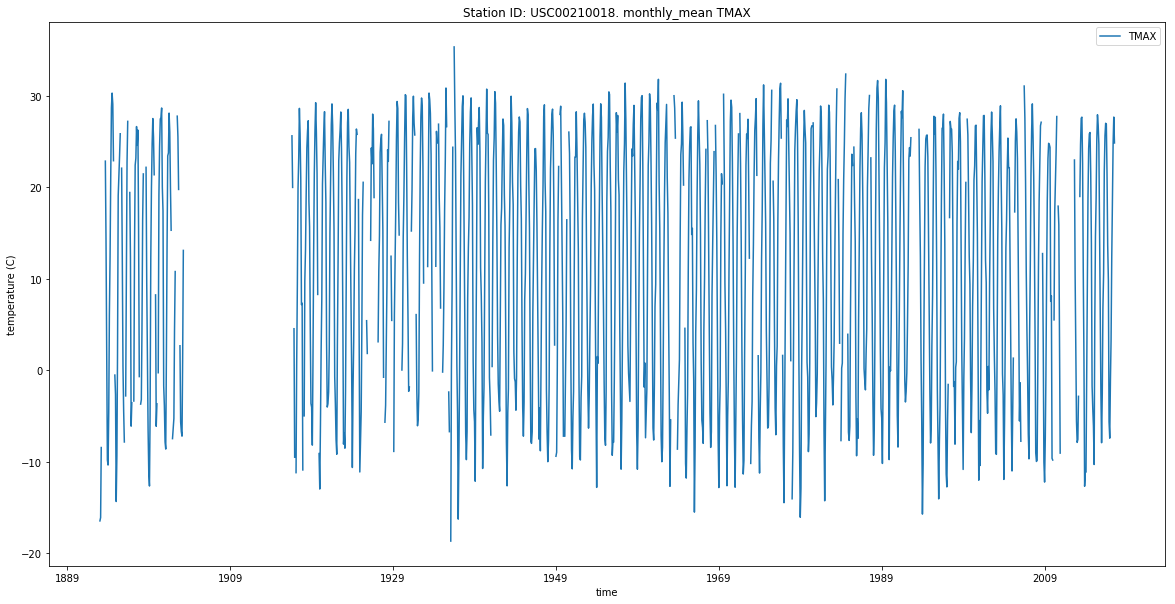

In [23]:
plotter.plotStationSeries(sp.stations[0], "TMAX")

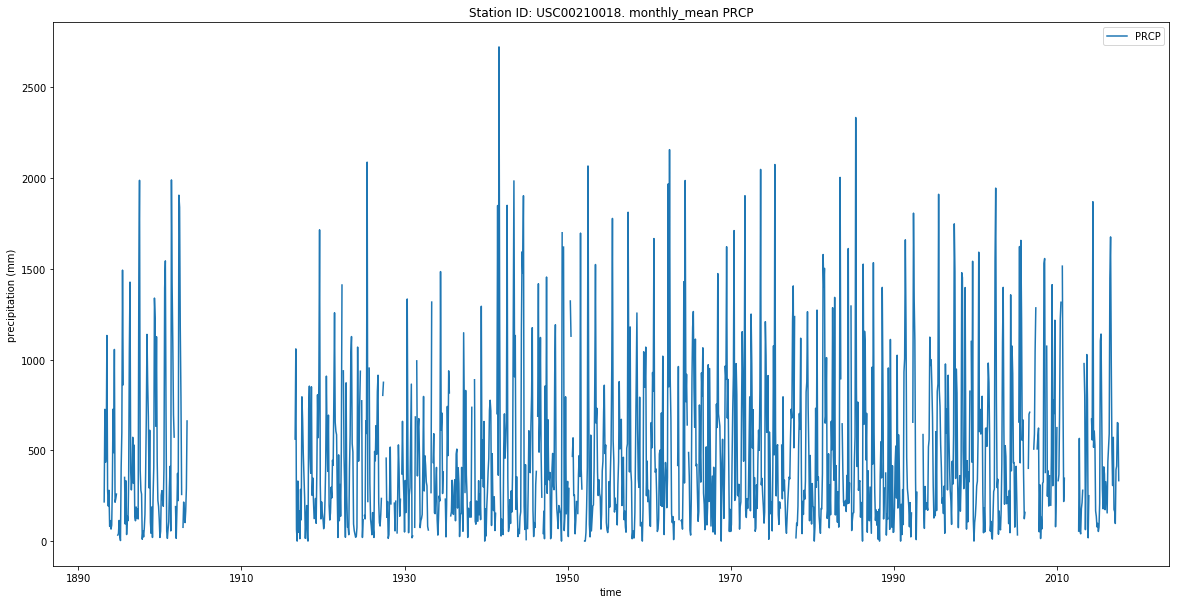

In [24]:
plotter.plotStationSeries(sp.stations[0], "PRCP")

There are also export options  

exportToShapefile - export the stations to a shapefile. This does not include the data values with it.  
exportToJSON - export the station's climate variable data to json.  
exportToDat - export the data to single column text files. One file for each station and variable in the station preprocessor.

In [26]:
sp.exportToShapefile("D:/GHCND_data/minnesota_wisconsin_ghcnd.shp")
sp.exportToJSON("D:/GHCND_data/minnesota_wisconsin_monthlydata.json")